# PCA

dimensions: ['body', 'brain', 'life', 'gestation']
 
Annotation: 'slowWaveSleep', 'dreamSleep', 'sleep'

In [1]:
# from loaddata import load_data
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt # to show images
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import io
import requests
import numpy as np

from sklearn.decomposition import PCA # for PCA calculation

In [2]:
### load data ###
def load_data(path="./data/sleep_original.csv", fill_nan=-999.00, keep_attr=['sleep', 'body', 'brain', 'life', 'gestation'], filter_nan=False, filter_list=[]):
    '''
        path: local directory of original data file
        fill_nan: replace NaN with specified number
        filter_nan: filter out data with NaN values
    '''
    
    # load data
    path = "./data/sleep_original.csv"
    if os.path.isfile(path):
        csv_file = pd.read_csv(path, usecols = keep_attr)
    else:
        url = "https://yao-lab.github.io/data/sleep1.csv" # Load original data
        src = requests.get(url).content
        csv_file = pd.read_csv(io.StringIO(src.decode('utf-8')),usecols = keep_attr)
    
    if filter_nan:
        if len(filter_list) == 0:
            filter_list = np.array(csv_file.columns)
        idx = []
        for x in filter_list:
            if len(idx) == 0:
                idx = csv_file[x].isna()
            else:
                idx = idx + (csv_file[x].isna())
        idx = list(map(lambda x: not x, idx))
        csv_file = csv_file[idx]
    else:
        csv_file = csv_file.fillna(fill_nan) # Replace NaN with -999.00 (regarded as infinitely negative)
    print("csv file size: ", csv_file.shape)
    
    # Extra data with attributes (dimensions), specials, and numeric data
    data = np.array(csv_file)[:, 1:]
    attrs = np.array(csv_file.columns[1:])
    species = np.array(csv_file)[:, 0]

    print("%d Attributes: " %len(attrs))
    print(attrs)
    print("%d Species: " %len(species))
    print(species)
    print("Data shape: ", data.shape) #get data size
#     print(data[:5])
    print()
    
    return attrs, species, data


In [3]:
attrs, species, data = load_data()
_, filtered_species, filtered_data = load_data(filter_nan=True)

csv file size:  (62, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
62 Species: 
[   3.3    8.3   12.5   16.5    3.9    9.8   19.7    6.2   14.5    9.7
   12.5    3.9   10.3    3.1    8.4    8.6   10.7   10.7    6.1   18.1
 -999.     3.8   14.4   12.     6.2   13.    13.8    8.2    2.9   10.8
 -999.     9.1   19.9    8.    10.6   11.2   13.2   12.8   19.4   17.4
 -999.    17.    10.9   13.7    8.4    8.4   12.5   13.2    9.8    9.6
    6.6    5.4    2.6    3.8   11.    10.3   13.3    5.4   15.8   10.3
   19.4 -999. ]
Data shape:  (62, 4)

csv file size:  (51, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
51 Species: 
[ 3.3  8.3 12.5  3.9  9.8 19.7  6.2 14.5  9.7 12.5  3.9  3.1  8.4  8.6
 10.7 10.7  3.8 14.4 12.   6.2 13.  13.8  8.2  2.9 10.8  9.1 19.9  8.
 13.2 12.8 19.4 17.4 17.  10.9 13.7  8.4  8.4 12.5 13.2  9.8  9.6  6.6
  5.4  2.6  3.8 11.  13.3  5.4 15.8 10.3 19.4]
Data shape:  (51, 4)



C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


In [4]:
def _PCA(attris, species, data):
    p = len(attrs)
    n = len(data)

    # mean value
    mu = np.mean(data, axis=0);
    print("mean: ", mu)

    # get PCA
    pca = PCA(n_components=2, svd_solver='arpack')
    pca.fit(data)
    print(pca.explained_variance_ratio_.shape) 
    print(pca.singular_values_.shape)

    # Plot PCA chart
    plt.plot(pca.explained_variance_ratio_, "o", linewidth=2)
    plt.axis('tight')
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.show()
    
    # Show top 3 components
    Y = pca.components_;
    print(Y.shape) # number of components
#     print(Y)
    X_reduction = pca.transform(data)
    
    return X_reduction, pca

csv file size:  (51, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
51 Species: 
[ 3.3  8.3 12.5  3.9  9.8 19.7  6.2 14.5  9.7 12.5  3.9  3.1  8.4  8.6
 10.7 10.7  3.8 14.4 12.   6.2 13.  13.8  8.2  2.9 10.8  9.1 19.9  8.
 13.2 12.8 19.4 17.4 17.  10.9 13.7  8.4  8.4 12.5 13.2  9.8  9.6  6.6
  5.4  2.6  3.8 11.  13.3  5.4 15.8 10.3 19.4]
Data shape:  (51, 4)



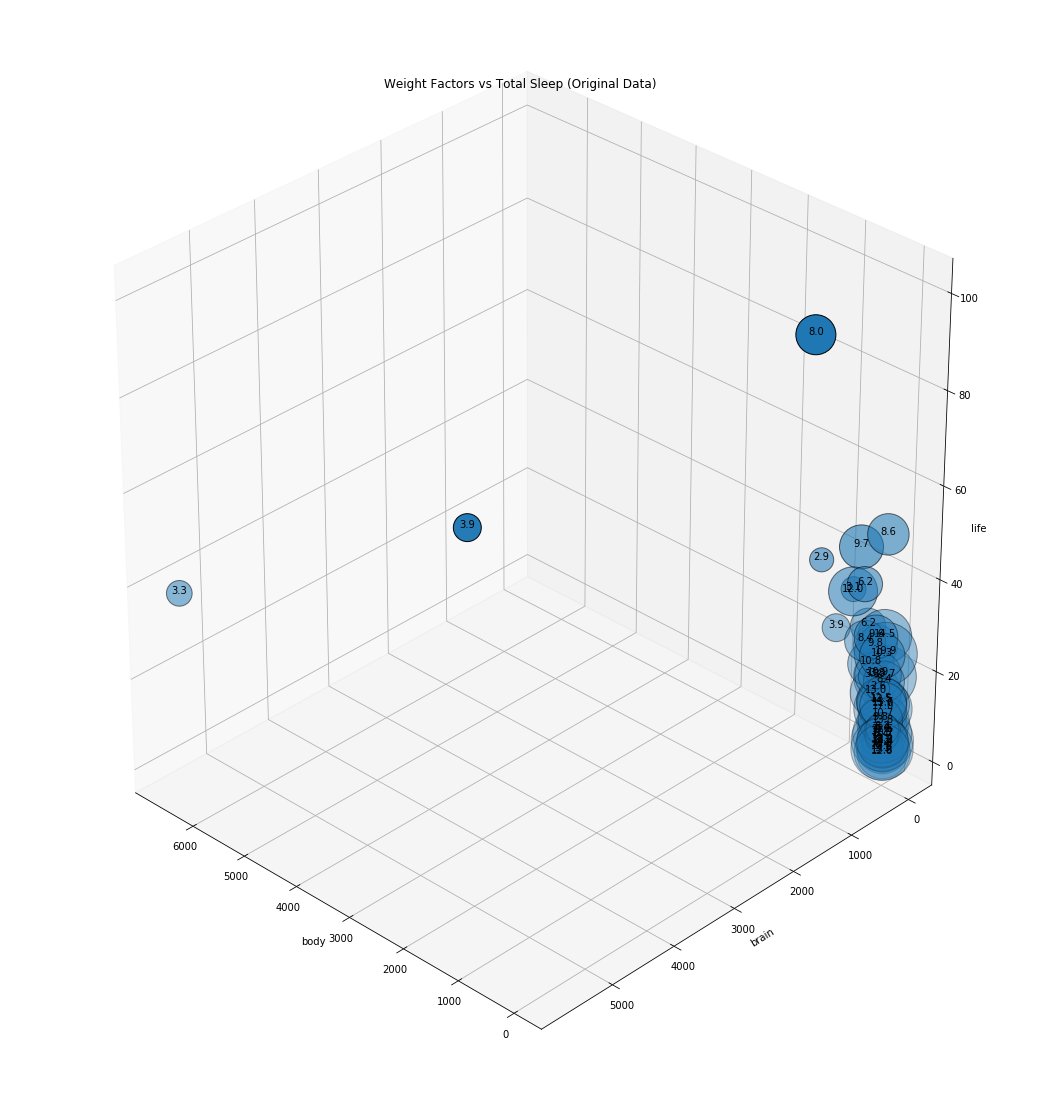

In [5]:
# sleep vs weight
# Comment: some correlation
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['sleep', 'body', 'brain', 'life', 'gestation'])

fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i],
              horizontalalignment='center')
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], 
           s=filtered_species.astype(np.float)*200, edgecolor='k')

ax.set_title('Weight Factors vs Total Sleep (Original Data)')
ax.set_xlabel('body')
ax.set_ylabel('brain')
ax.set_zlabel('life')

plt.show()

mean:  [198.78998387 283.13419355 -45.85645161  68.71774194]
(2,)
(2,)


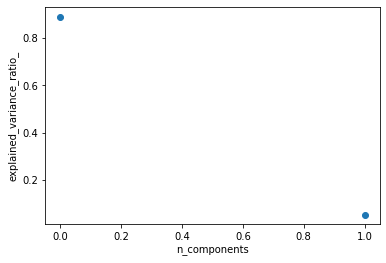

(2, 4)


c:\users\cheny\appdata\local\programs\python\python36\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


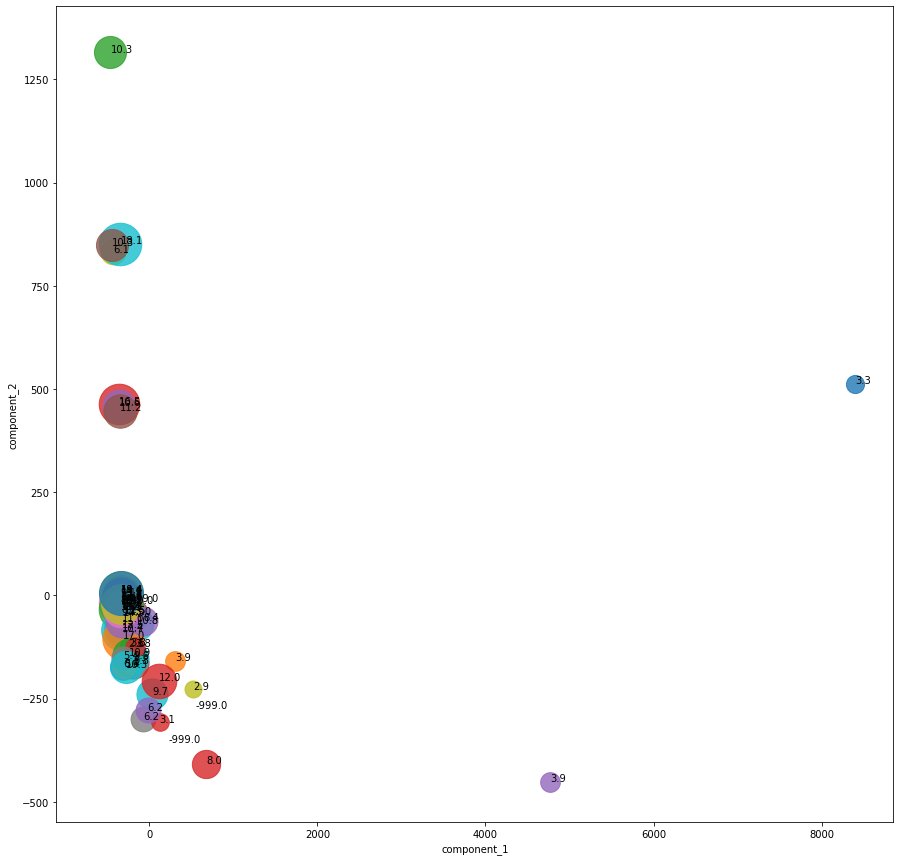

In [6]:
X = _PCA(attrs, species, data)[0]

plt.figure(figsize=(15,15))
for i in range(len(species)):
    plt.scatter(X[i, 0], X[i, 1], alpha=0.8, label='sleep', s=float(species[i])*100)
    plt.annotate(species[i], (X[i, 0]+0.1, X[i, 1]+0.1))

plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

mean:  [224.36307843 317.50235294  20.14705882 142.06862745]
(2,)
(2,)


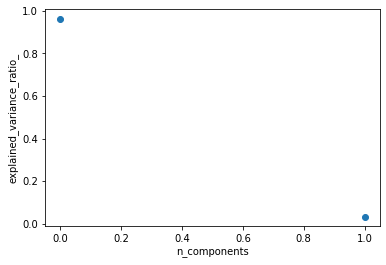

(2, 4)


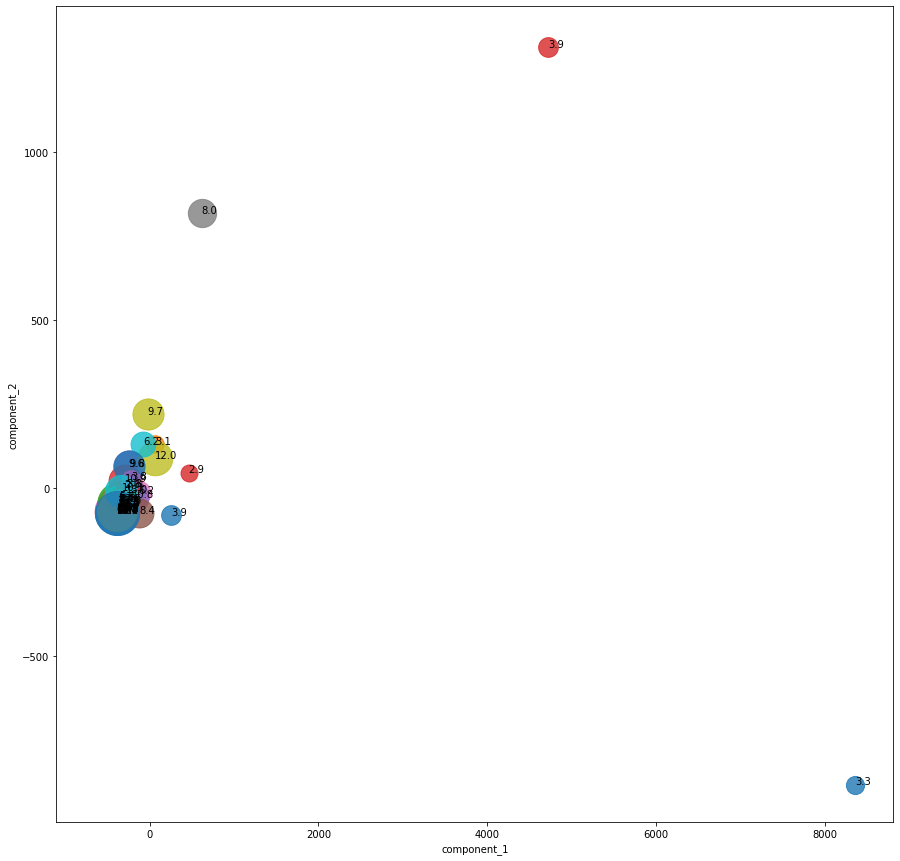

In [7]:
X_filter = _PCA(attrs, filtered_species, filtered_data)[0]

plt.figure(figsize=(15,15))
for i in range(len(filtered_species)):
    plt.scatter(X_filter[i, 0], X_filter[i, 1], alpha=0.8, label=filtered_species[i], s=float(filtered_species[i])*100)
    plt.annotate(filtered_species[i], (X_filter[i, 0]+0.1, X_filter[i, 1]+0.1))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (42, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
42 Species: 
[ 6.3  2.1  9.1 15.8  5.2 10.9  8.3 11.   3.2  6.3  8.6  6.6  9.5  3.3
 11.   4.7 10.4  7.4  2.1  7.7 17.9  6.1 11.9 10.8 13.8 14.3 15.2 10.
 11.9  6.5  7.5 10.6  7.4  8.4  5.7  4.9  3.2 11.   4.9 13.2  9.7 12.8]
Data shape:  (42, 4)



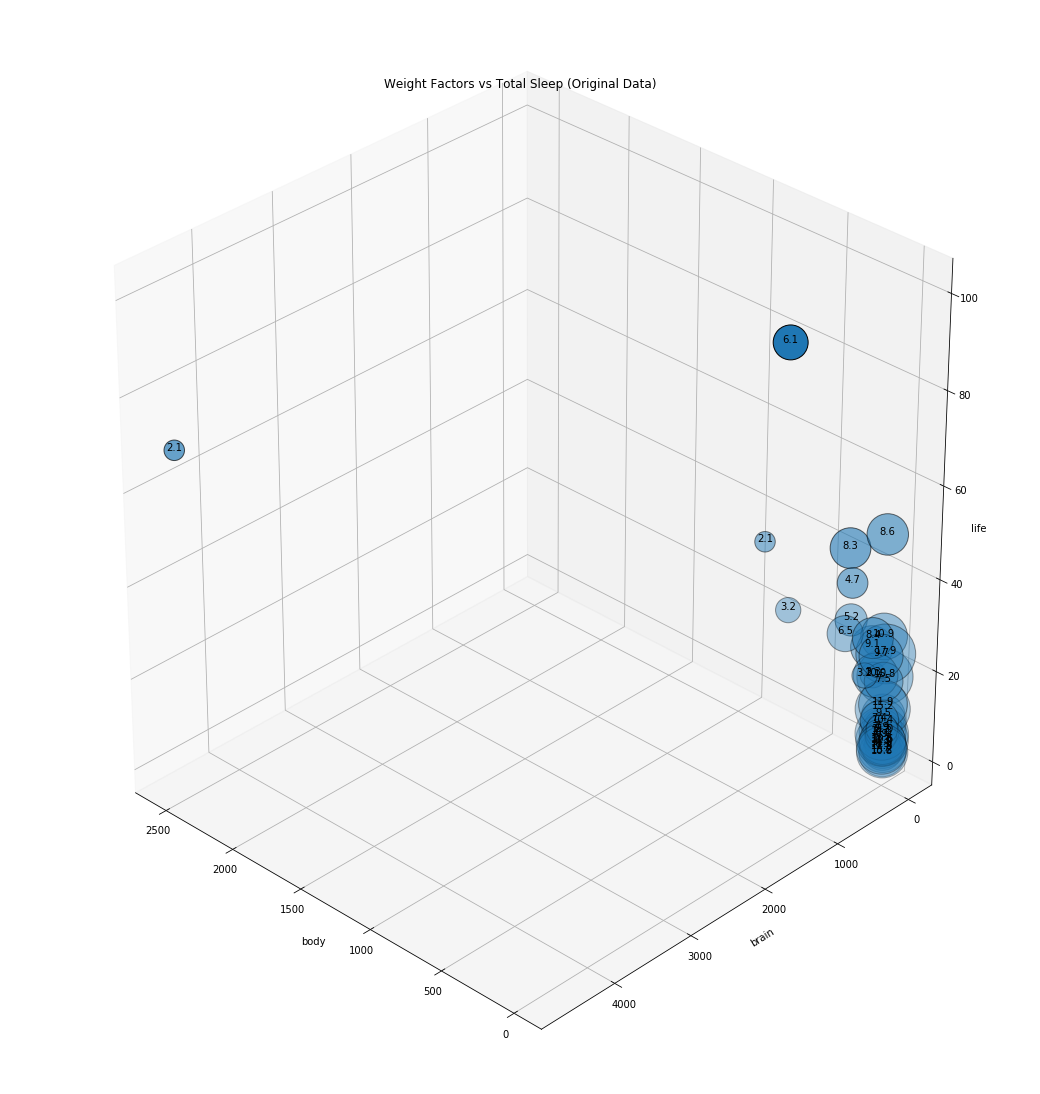

In [8]:
# slow wave sleep vs weight
# Comment: some correlation
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['slowWaveSleep', 'body', 'brain', 'life', 'gestation'])

fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i],
              horizontalalignment='center')
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], 
           s=filtered_species.astype(np.float)*200, edgecolor='k')

ax.set_title('Weight Factors vs Total Sleep (Original Data)')
ax.set_xlabel('body')
ax.set_ylabel('brain')
ax.set_zlabel('life')

plt.show()

csv file size:  (42, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
42 Species: 
[ 6.3  2.1  9.1 15.8  5.2 10.9  8.3 11.   3.2  6.3  8.6  6.6  9.5  3.3
 11.   4.7 10.4  7.4  2.1  7.7 17.9  6.1 11.9 10.8 13.8 14.3 15.2 10.
 11.9  6.5  7.5 10.6  7.4  8.4  5.7  4.9  3.2 11.   4.9 13.2  9.7 12.8]
Data shape:  (42, 4)

mean:  [100.81390476 218.68380952  19.37142857 129.94047619]
(2,)
(2,)


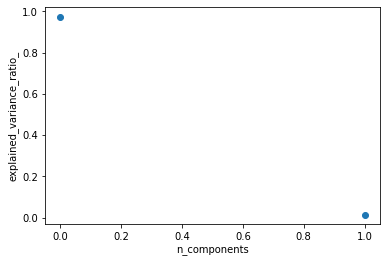

(2, 4)


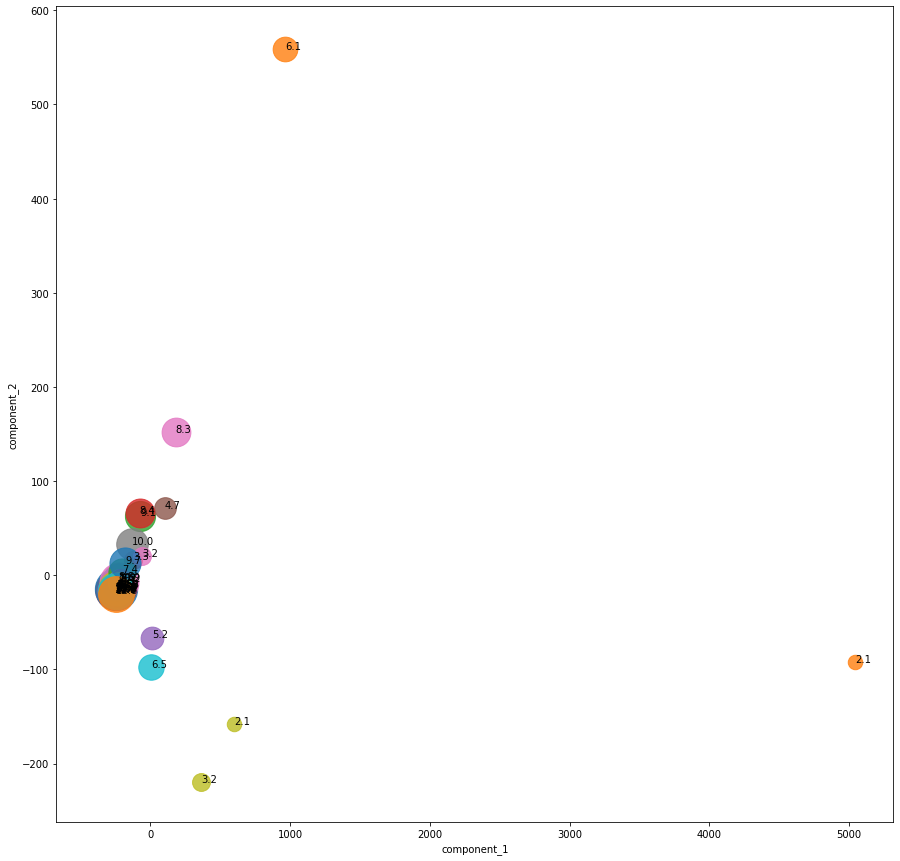

In [9]:
# Slow wave sleep is correlated to weight factors in origianl paper

attrs, filtered_species_ss, filtered_data_ss = load_data(filter_nan=True, keep_attr=['slowWaveSleep', 'body', 'brain', 'life', 'gestation'])

X_filter_ss = _PCA(attrs, filtered_species_ss, filtered_data_ss)[0]

plt.figure(figsize=(15,15))
for i in range(len(filtered_species_ss)):
    plt.scatter(X_filter_ss[i, 0], X_filter_ss[i, 1], alpha=0.8, label=filtered_species_ss[i], s=float(filtered_species_ss[i])*100)
    plt.annotate(filtered_species_ss[i], (X_filter_ss[i, 0]+0.1, X_filter_ss[i, 1]+0.1))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (44, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
44 Species: 
[2.  1.8 0.7 3.9 1.  3.6 1.4 1.5 0.7 2.1 0.  4.1 1.2 0.3 0.5 3.4 1.5 3.4
 0.8 0.8 1.4 2.  1.9 1.3 2.  5.6 3.1 1.  1.8 0.9 1.8 1.9 0.9 2.6 2.4 1.2
 0.9 0.5 0.6 2.3 0.5 2.6 0.6 6.6]
Data shape:  (44, 4)



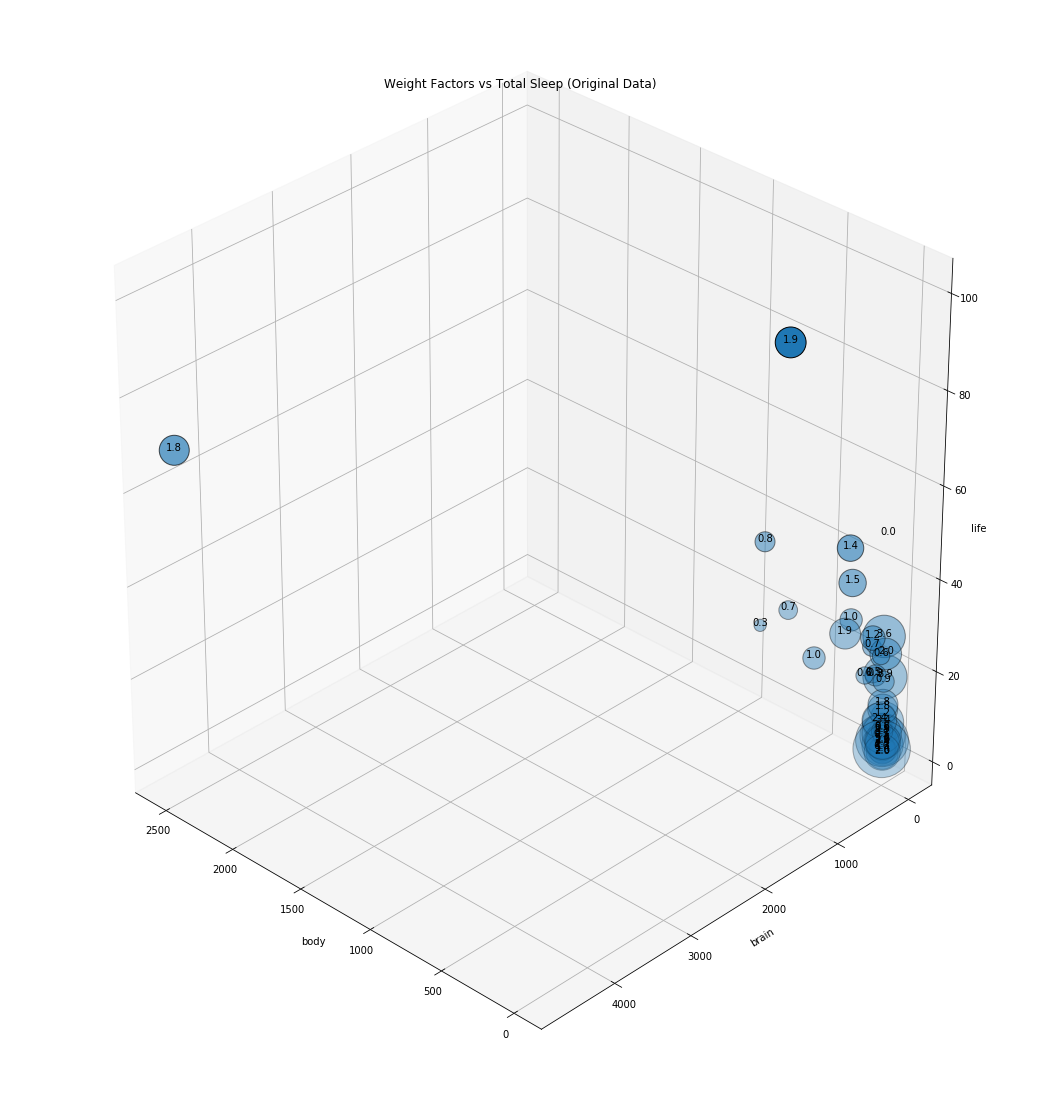

In [10]:
# dream sleep vs weight
# Comment: some correlation
attrs, filtered_species, filtered_data = load_data(filter_nan=True, keep_attr=['dreamSleep', 'body', 'brain', 'life', 'gestation'])

fig = plt.figure(1, figsize=(15, 15))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=134)

plt.cla()

for i in range(len(filtered_species)):
    ax.text3D(filtered_data[i, 0],
              filtered_data[i, 1],
              filtered_data[i, 2], filtered_species[i],
              horizontalalignment='center')
    
# Reorder the labels to have colors matching the cluster results
ax.scatter(filtered_data[:, 0], filtered_data[:, 1], filtered_data[:, 2], 
           s=filtered_species.astype(np.float)*500, edgecolor='k')

ax.set_title('Weight Factors vs Total Sleep (Original Data)')
ax.set_xlabel('body')
ax.set_ylabel('brain')
ax.set_zlabel('life')

plt.show()

csv file size:  (44, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
44 Species: 
[2.  1.8 0.7 3.9 1.  3.6 1.4 1.5 0.7 2.1 0.  4.1 1.2 0.3 0.5 3.4 1.5 3.4
 0.8 0.8 1.4 2.  1.9 1.3 2.  5.6 3.1 1.  1.8 0.9 1.8 1.9 0.9 2.6 2.4 1.2
 0.9 0.5 0.6 2.3 0.5 2.6 0.6 6.6]
Data shape:  (44, 4)

mean:  [113.936      235.33454545  19.66363636 143.125     ]
(2,)
(2,)


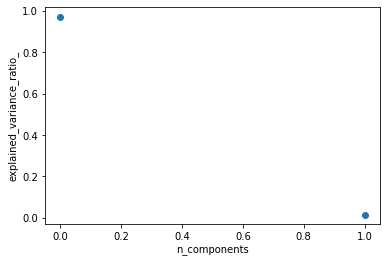

(2, 4)


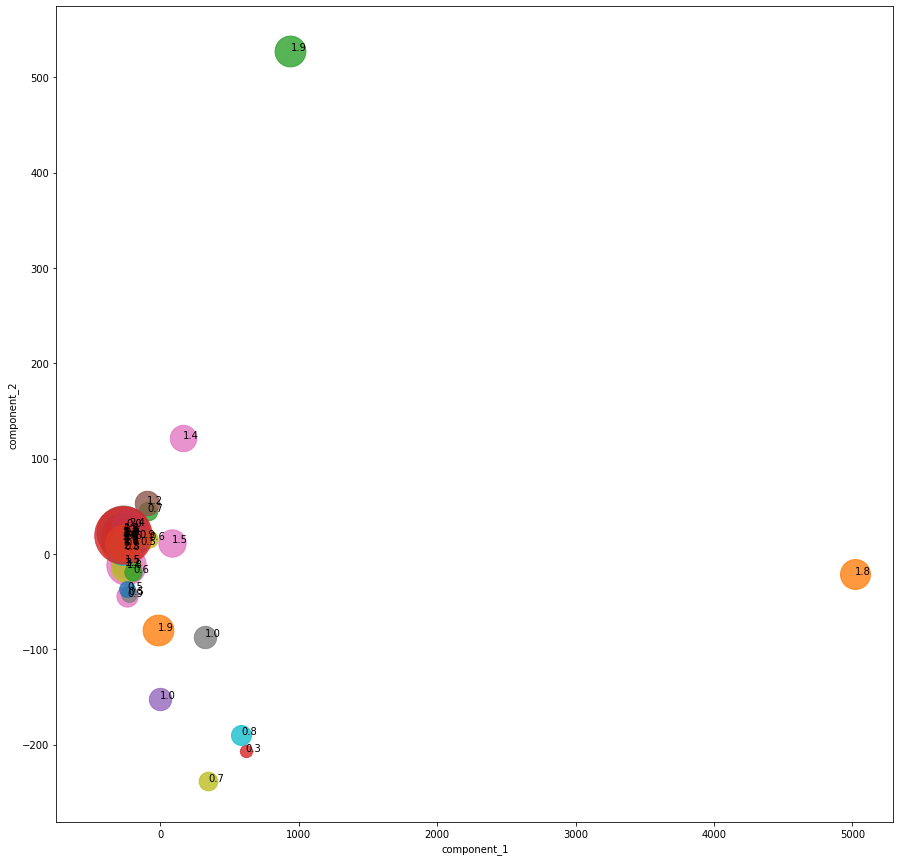

In [11]:
attrs, filtered_species_ds, filtered_data_ds = load_data(filter_nan=True, keep_attr=['dreamSleep', 'body', 'brain', 'life', 'gestation'])

X_filter_ds = _PCA(attrs, filtered_species_ds, filtered_data_ds)[0]

plt.figure(figsize=(15,15))
for i in range(len(filtered_species_ds)):
    plt.scatter(X_filter_ds[i, 0], X_filter_ds[i, 1], alpha=0.8, label=filtered_species_ds[i], s=float(filtered_species_ds[i])*500)
    plt.annotate(filtered_species_ds[i], (X_filter_ds[i, 0]+0.1, X_filter_ds[i, 1]+0.1))
    
plt.xlabel('component_1')
plt.ylabel('component_2')
plt.show()

# Manifold

In [12]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (44, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
44 Species: 
[2.  1.8 0.7 3.9 1.  3.6 1.4 1.5 0.7 2.1 0.  4.1 1.2 0.3 0.5 3.4 1.5 3.4
 0.8 0.8 1.4 2.  1.9 1.3 2.  5.6 3.1 1.  1.8 0.9 1.8 1.9 0.9 2.6 2.4 1.2
 0.9 0.5 0.6 2.3 0.5 2.6 0.6 6.6]
Data shape:  (44, 4)

standard: 0.0062 sec
ltsa: 0.0073 sec
hessian: 0.012 sec
modified: 0.011 sec
Isomap: 0.003 sec
MDS: 0.014 sec
SpectralEmbedding: 0.0049 sec
t-SNE: 0.19 sec


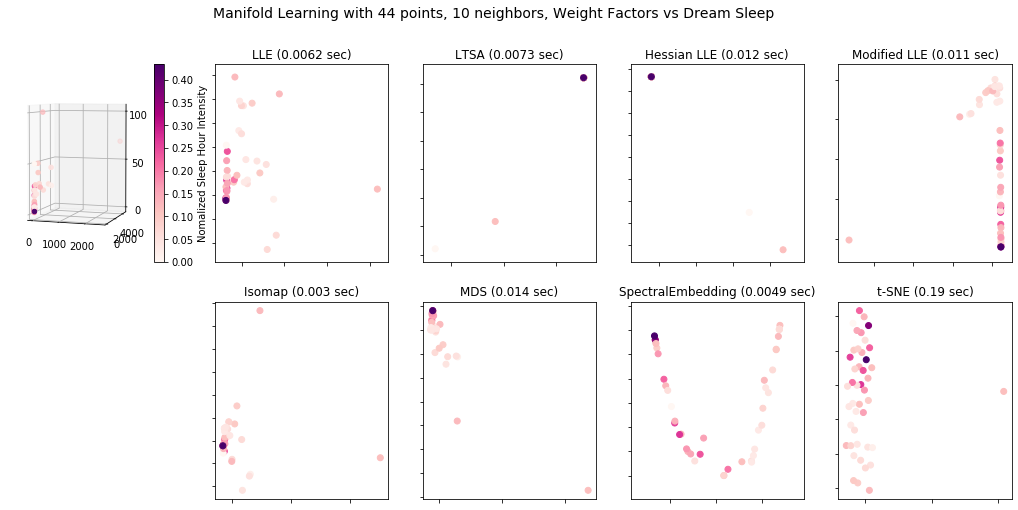

In [14]:
# dream sleep vs weight factors
attrs, filtered_species_ds, filtered_data_ds = load_data(filter_nan=True, keep_attr=['dreamSleep', 'body', 'brain', 'life', 'gestation'])

sleep_w = filtered_species_ds.astype(np.float)
color = sleep_w / np.linalg.norm(sleep_w)

n_points = len(filtered_species_ds)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(18, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, Weight Factors vs Dream Sleep"
             % (n_points, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
p = ax.scatter(filtered_data_ds[:, 0], filtered_data_ds[:, 1], filtered_data_ds[:, 2], c=color, cmap='RdPu')
ax.view_init(4, -72)
cbar = plt.colorbar(p)
cbar.set_label('Nomalized Sleep Hour Intensity')

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(filtered_data_ds)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(filtered_data_ds)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(filtered_data_ds)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(filtered_data_ds)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(filtered_data_ds)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# cbar = plt.colorbar()
# cbar.set_label('Color Intensity')
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (42, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
42 Species: 
[ 6.3  2.1  9.1 15.8  5.2 10.9  8.3 11.   3.2  6.3  8.6  6.6  9.5  3.3
 11.   4.7 10.4  7.4  2.1  7.7 17.9  6.1 11.9 10.8 13.8 14.3 15.2 10.
 11.9  6.5  7.5 10.6  7.4  8.4  5.7  4.9  3.2 11.   4.9 13.2  9.7 12.8]
Data shape:  (42, 4)

standard: 0.0065 sec
ltsa: 0.0081 sec
hessian: 0.013 sec
modified: 0.011 sec
Isomap: 0.003 sec
MDS: 0.015 sec
SpectralEmbedding: 0.0049 sec
t-SNE: 0.19 sec


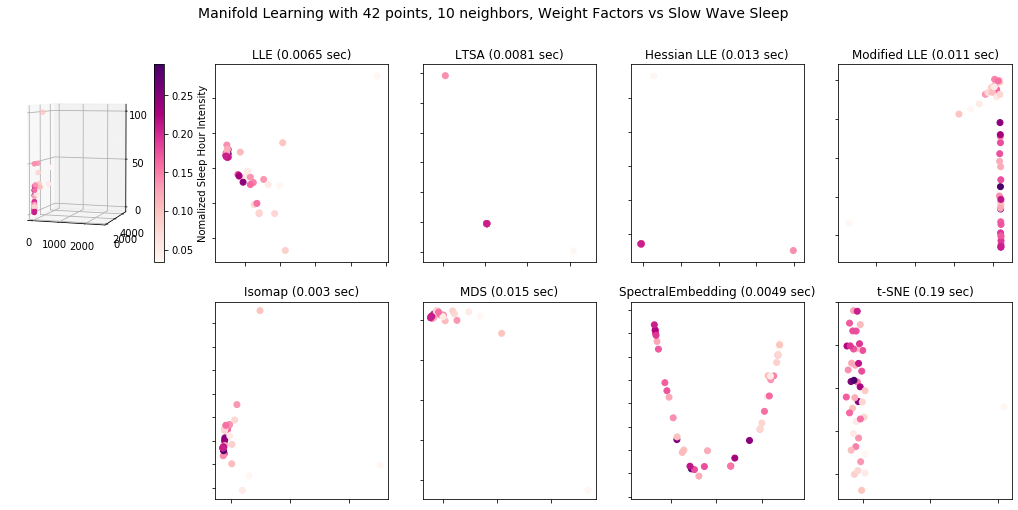

In [15]:
# slow wave sleep vs weight factors
attrs, filtered_species_ds, filtered_data_ds = load_data(filter_nan=True, keep_attr=['slowWaveSleep', 'body', 'brain', 'life', 'gestation'])

sleep_w = filtered_species_ds.astype(np.float)
color = sleep_w / np.linalg.norm(sleep_w)

n_points = len(filtered_species_ds)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(18, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, Weight Factors vs Slow Wave Sleep"
             % (n_points, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
p = ax.scatter(filtered_data_ds[:, 0], filtered_data_ds[:, 1], filtered_data_ds[:, 2], c=color, cmap='RdPu')
ax.view_init(4, -72)
cbar = plt.colorbar(p)
cbar.set_label('Nomalized Sleep Hour Intensity')

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(filtered_data_ds)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(filtered_data_ds)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(filtered_data_ds)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(filtered_data_ds)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(filtered_data_ds)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# cbar = plt.colorbar()
# cbar.set_label('Color Intensity')
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

C:\Users\cheny\AppData\Roaming\Python\Python36\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


csv file size:  (44, 5)
4 Attributes: 
['body' 'brain' 'life' 'gestation']
44 Species: 
[2.  1.8 0.7 3.9 1.  3.6 1.4 1.5 0.7 2.1 0.  4.1 1.2 0.3 0.5 3.4 1.5 3.4
 0.8 0.8 1.4 2.  1.9 1.3 2.  5.6 3.1 1.  1.8 0.9 1.8 1.9 0.9 2.6 2.4 1.2
 0.9 0.5 0.6 2.3 0.5 2.6 0.6 6.6]
Data shape:  (44, 4)

standard: 0.006 sec
ltsa: 0.009 sec
hessian: 0.013 sec
modified: 0.011 sec
Isomap: 0.002 sec
MDS: 0.014 sec
SpectralEmbedding: 0.003 sec
t-SNE: 0.19 sec


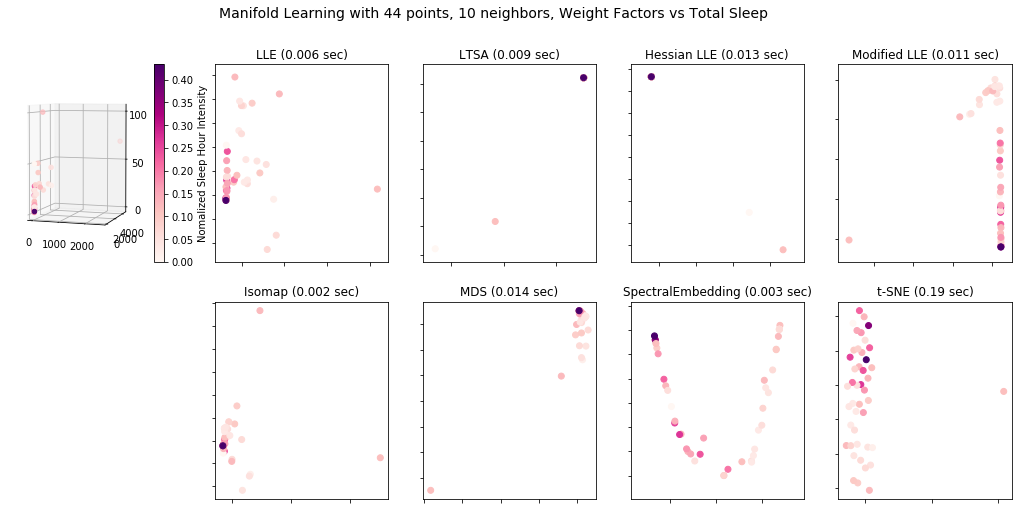

In [16]:
# total sleep vs weight factors
attrs, filtered_species_ds, filtered_data_ds = load_data(filter_nan=True, keep_attr=['dreamSleep', 'body', 'brain', 'life', 'gestation'])

sleep_w = filtered_species_ds.astype(np.float)
color = sleep_w / np.linalg.norm(sleep_w)

n_points = len(filtered_species_ds)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(18, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors, Weight Factors vs Total Sleep"
             % (n_points, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
p = ax.scatter(filtered_data_ds[:, 0], filtered_data_ds[:, 1], filtered_data_ds[:, 2], c=color, cmap='RdPu')
ax.view_init(4, -72)
cbar = plt.colorbar(p)
cbar.set_label('Nomalized Sleep Hour Intensity')

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(filtered_data_ds)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(filtered_data_ds)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(filtered_data_ds)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(filtered_data_ds)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(filtered_data_ds)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap='RdPu')
# plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
# cbar = plt.colorbar()
# cbar.set_label('Color Intensity')
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()